In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

TOP_POSTER_LIMIT = 10
DOMAIN_LIMIT = 25
REPLIES_THRESHOLD = 150

df = pd.read_csv("data/latest-articles.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='s')
df["title"] = df["title"].astype("category")
df["posted_by"] = df["posted_by"].astype("category")
df["source_url"] = df["source_url"].astype("category")

In [2]:
# A thread is considered sourced if it has a URL link.
sourced = df[df.source_url != ""]

# This is not entirely accurate since some vanity posts have links.
vanity = df[df.source_url == ""]

In [3]:
def extract_domain(url) -> str:
    return (
        url.
            replace("www.","").
            replace("http://", "").
            replace("https://", "").
            split("/")[0]
    )


sourced.insert(len(sourced.columns)-1, "domain", (
    sourced.
        source_url.
        apply(extract_domain).
        astype("category")
))

<AxesSubplot:xlabel='count', ylabel='domain'>

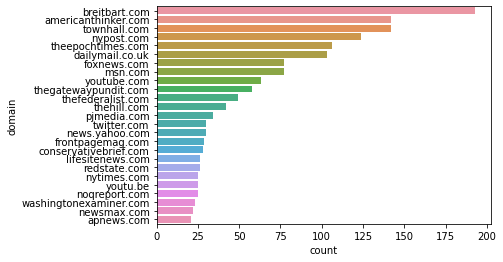

In [4]:
# Draws a chart that shows where discussion for a particular thread originated from.
data = sourced[["source_url", "domain"]].drop_duplicates()
top_sourced_domains = data.domain.value_counts().iloc[:DOMAIN_LIMIT].index
sns.countplot(
    y="domain",
    data=data,
    order=top_sourced_domains,
)

<AxesSubplot:xlabel='count', ylabel='posted_by'>

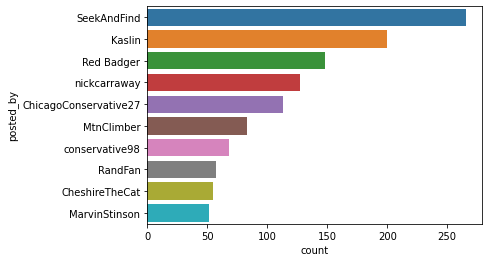

In [5]:
# Draws a chart that shows who posted a topic to be discussed that has a URL source.
data = sourced[["source_url", "posted_by"]].drop_duplicates()
top_sourced_posters = data.posted_by.value_counts().iloc[:TOP_POSTER_LIMIT].index
sns.countplot(
    y="posted_by",
    data=data,
    order=top_sourced_posters,
)

In [6]:
# Comment this if you don't want to see everything.
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Draws a table that shows which freepers posted topics from a sourced link that originated
# from a particular domain.
who_is_posting_from_what = (
    sourced[["posted_by", "source_url", "domain"]].
    query("posted_by in @top_sourced_posters and domain in @top_sourced_domains").
    drop_duplicates().
    groupby(["domain", "posted_by"])
)
who_is_posting_from_what[["domain"]].describe()

domain         \
                                              count unique   
domain                 posted_by                             
americanthinker.com    CheshireTheCat             1      1   
                       Kaslin                    46      1   
                       MtnClimber                50      1   
                       SeekAndFind               37      1   
apnews.com             SeekAndFind                1      1   
                       RandFan                    3      1   
                       Red Badger                 1      1   
breitbart.com          CheshireTheCat             3      1   
                       MtnClimber                 1      1   
                       SeekAndFind                3      1   
                       RandFan                    1      1   
                       Red Badger                 4      1   
                       ChicagoConservative27     81      1   
                       MarvinStinson             37      1   
                       conservative98             3      1   
conservativebrief.com  Red Badger                 1      1   
dailymail.co.uk        Red Badger                 1      1   
                       ChicagoConservative27      1      1   
                       conservative98             1      1   
foxnews.com            SeekAndFind                1      1   
                       RandFan                    3      1   
                       Red Badger                 2      1   
                       conservative98            20      1   
                       nickcarraway               1      1   
frontpagemag.com       CheshireTheCat             1      1   
                       SeekAndFind                2      1   
msn.com                SeekAndFind                8      1   
                       MarvinStinson              1      1   
                       nickcarraway               2      1   
news.yahoo.com         MtnClimber                 1      1   
                       SeekAndFind                1      1   
                       Red Badger                 1      1   
                       conservative98             1      1   
                       nickcarraway               3      1   
noqreport.com          SeekAndFind               17      1   
                       Red Badger                 4      1   
nypost.com             SeekAndFind                2      1   
                       Red Badger                 3      1   
                       ChicagoConservative27     12      1   
                       conservative98            10      1   
                       nickcarraway              44      1   
nytimes.com            RandFan                    1      1   
pjmedia.com            CheshireTheCat             1      1   
                       SeekAndFind               21      1   
                       Red Badger                 1      1   
redstate.com           CheshireTheCat             1      1   
                       Kaslin                     2      1   
                       SeekAndFind               21      1   
                       conservative98             1      1   
theepochtimes.com      SeekAndFind               32      1   
thefederalist.com      CheshireTheCat             1      1   
                       Kaslin                    34      1   
                       SeekAndFind                9      1   
                       RandFan                    1      1   
thegatewaypundit.com   SeekAndFind                3      1   
                       Red Badger                 5      1   
thehill.com            RandFan                   16      1   
                       Red Badger                 1      1   
                       ChicagoConservative27      8      1   
                       MarvinStinson              1      1   
                       conservative98             2      1   
townhall.com           Kaslin                   115      1   
               

In [7]:
# Display which posts got the most replies before
# they aged out from the front page.

(sourced[['timestamp', 'title', 'replies']].
     loc[sourced.replies > REPLIES_THRESHOLD].
     groupby('title').
     max().
     sort_values('replies', ascending=False).
     dropna())

,timestamp,replies
title,,
Actual cost to manufacture American pick-up trucks,2021-04-05 00:03:42,185.0
